# 1.Data Loading and Preprocessing

### Text File Reader

#### CharacterTextSplitter
This method simply divides text into chunks based on individual characters.
> This basic approach splits text character by character.

> Suitable for tasks where maintaining exact logical units of text (like sentences or paragraphs) isn't crucial, but where you need to ensure that chunks of text do not exceed a certain length.

In [111]:
from langchain_community.vectorstores import DeepLake
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.document_loaders import TextLoader

# Load the text document
loader = TextLoader("Harry Potter 1 - Sorcerer's Stone.txt")
documents = loader.load()

# Split the text into chunks
text_splitter = CharacterTextSplitter(chunk_size=1100, chunk_overlap=0)
split_documents = text_splitter.split_documents(documents)

In [112]:
docs = text_splitter.split_documents(documents)

In [113]:
docs

[Document(metadata={'source': "Harry Potter 1 - Sorcerer's Stone.txt"}, page_content="Harry Potter and the Sorcerer's Stone\n\n\nCHAPTER ONE\n\nTHE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.\n\nMr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. The Dursleys had a small son called Dudley and in their\nopinion there was no finer boy anywhere."),
 Document(metadata={'source': "Harry Potter 1 - Sorcerer's Stone.txt"}, page_content="The Dursleys had

#### One major issue with this text splitter is that if the text exceeds the chunk size and there is no separator available to split the text, it beomes problematic. This is where the next separator is utilized.

### RecursiveCharacterTextSplitter
Smarter splitting that attempts to maintain logical text boundaries, improving coherence within each chunk.
>Ideal for tasks where maintaining the integrity of logical units of text is important, such as in text summarization, question-answering systems, or other NLP tasks where context within a chunk is crucial.

In [ ]:
# Extract the page_content from each Document object
page_contents = [document.page_content for document in split_documents]

# Print the extracted page_contents
#for content in page_contents:
    #print(content)
page_contents

In [117]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n","\n", " "],
    chunk_size = 1000,
    chunk_overlap = 10,
    #length_function = len_func,
    is_separator_regex=False
)

chunk_list = text_splitter.create_documents(texts = page_contents)

In [118]:
chunk_list

[Document(page_content="Harry Potter and the Sorcerer's Stone\n\n\nCHAPTER ONE\n\nTHE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much. They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.\n\nMr. Dursley was the director of a firm called Grunnings, which made\ndrills. He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. The Dursleys had a small son called Dudley and in their\nopinion there was no finer boy anywhere."),
 Document(page_content="The Dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. They didn

### PDF File Reader

In [119]:
from pypdf import PdfReader
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

def word_wrap(string, n_chars=72):
    # Wrap a string at the next space after n_chars
    if len(string) < n_chars:
        return string
    else:
        return string[:n_chars].rsplit(' ', 1)[0] + '\n' + word_wrap(string[len(string[:n_chars].rsplit(' ', 1)[0])+1:], n_chars)

reader = PdfReader("microsoft_annual_report_2022.pdf")
pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

print(word_wrap(pdf_texts[0]))

1 Dear shareholders, colleagues, customers, and partners:  
We are
living through a period of historic economic, societal, and
geopolitical change. The world in 2022 looks nothing like 
the world in
2019. As I write this, inflation is at a 40 -year high, supply chains
are stretched, and the war in Ukraine is 
ongoing. At the same time, we
are entering a technological era with the potential to power awesome
advancements 
across every sector of our economy and society. As the
world’s largest software company, this places us at a historic

intersection of opportunity and responsibility to the world around us.
 
Our mission to empower every person and every organization on the
planet to achieve more has never been more 
urgent or more necessary.
For all the uncertainty in the world, one thing is clear: People and
organizations in every 
industry are increasingly looking to digital
technology to overcome today’s challenges and emerge stronger. And no

company is better positioned to help th

 ### RecursiveCharacterTextSplitter

In [122]:
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(word_wrap(character_split_texts[10]))
print(f"\nTotal chunks: {len(character_split_texts)}")

increased, due in large part to significant global datacenter
expansions and the growth in Xbox sales and usage. Despite 
these
increases, we remain dedicated to achieving a net -zero future. We
recognize that progress won’t always be linear, 
and the rate at which
we can implement emissions reductions is dependent on many factors that
can fluctuate over time.  
On the path to becoming water positive, we
invested in 21 water replenishment projects that are expected to
generate 
over 1.3  million cubic meters of volumetric benefits in nine
water basins around the world. Progress toward our zero waste

commitment included diverting more than 15,200 metric tons of solid
waste otherwise headed to landfills and incinerators, 
as well as
launching new Circular Centers to increase reuse and reduce e -waste at
our datacenters.  
We contracted to protect over 17,000 acres of land
(50% more than the land we use to operate), thus achieving our

Total chunks: 347


### Arxiv File Reader

In [123]:
from langchain_community.document_loaders import ArxivLoader

In [124]:
docs = ArxivLoader(query="2402.06196", load_max_docs=2).load()
len(docs)

1

In [125]:
docs[0].metadata  # meta-information of the Document

{'Published': '2024-02-20',
 'Title': 'Large Language Models: A Survey',
 'Authors': 'Shervin Minaee, Tomas Mikolov, Narjes Nikzad, Meysam Chenaghlu, Richard Socher, Xavier Amatriain, Jianfeng Gao',
 'Summary': "Large Language Models (LLMs) have drawn a lot of attention due to their\nstrong performance on a wide range of natural language tasks, since the release\nof ChatGPT in November 2022. LLMs' ability of general-purpose language\nunderstanding and generation is acquired by training billions of model's\nparameters on massive amounts of text data, as predicted by scaling laws\n\\cite{kaplan2020scaling,hoffmann2022training}. The research area of LLMs, while\nvery recent, is evolving rapidly in many different ways. In this paper, we\nreview some of the most prominent LLMs, including three popular LLM families\n(GPT, LLaMA, PaLM), and discuss their characteristics, contributions and\nlimitations. We also give an overview of techniques developed to build, and\naugment LLMs. We then surve

In [126]:
docs[0].page_content[:800]  # all pages of the Document content

'Large Language Models: A Survey\nShervin Minaee, Tomas Mikolov, Narjes Nikzad, Meysam Chenaghlu\nRichard Socher, Xavier Amatriain, Jianfeng Gao\nAbstract—Large Language Models (LLMs) have drawn a\nlot of attention due to their strong performance on a wide\nrange of natural language tasks, since the release of ChatGPT\nin November 2022. LLMs’ ability of general-purpose language\nunderstanding and generation is acquired by training billions of\nmodel’s parameters on massive amounts of text data, as predicted\nby scaling laws [1], [2]. The research area of LLMs, while very\nrecent, is evolving rapidly in many different ways. In this paper,\nwe review some of the most prominent LLMs, including three\npopular LLM families (GPT, LLaMA, PaLM), and discuss their\ncharacteristics, contributions and limitations.'

In [121]:
#docs

In [128]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n","\n", " "],
    chunk_size = 1000,
    chunk_overlap = 10,
    #length_function = len_func,
    is_separator_regex=False
)

chunk_list = text_splitter.create_documents(texts=[docs[0].page_content])

In [129]:
chunk_list

[Document(page_content='Large Language Models: A Survey\nShervin Minaee, Tomas Mikolov, Narjes Nikzad, Meysam Chenaghlu\nRichard Socher, Xavier Amatriain, Jianfeng Gao\nAbstract—Large Language Models (LLMs) have drawn a\nlot of attention due to their strong performance on a wide\nrange of natural language tasks, since the release of ChatGPT\nin November 2022. LLMs’ ability of general-purpose language\nunderstanding and generation is acquired by training billions of\nmodel’s parameters on massive amounts of text data, as predicted\nby scaling laws [1], [2]. The research area of LLMs, while very\nrecent, is evolving rapidly in many different ways. In this paper,\nwe review some of the most prominent LLMs, including three\npopular LLM families (GPT, LLaMA, PaLM), and discuss their\ncharacteristics, contributions and limitations. We also give an\noverview of techniques developed to build, and augment LLMs.\nWe then survey popular datasets prepared for LLM training,\nfine-tuning, and evalua

### HTML File Reader

In [131]:
from langchain_text_splitters import HTMLHeaderTextSplitter
from langchain_text_splitters import RecursiveCharacterTextSplitter

url = "https://plato.stanford.edu/entries/goedel/"

headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
    ("h4", "Header 4"),
]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on=headers_to_split_on)

# for local file use html_splitter.split_text_from_file(<path_to_file>)
html_header_splits = html_splitter.split_text_from_url(url)

chunk_size = 500
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(html_header_splits)
splits[0:5]

[Document(page_content="Stanford Encyclopedia of Philosophy  \nMenu  \nBrowse About Support SEP  \nTable of Contents What's New Random Entry Chronological Archives  \nEditorial Information About the SEP Editorial Board How to Cite the SEP Special Characters Advanced Tools Contact  \nSupport the SEP PDFs for SEP Friends Make a Donation SEPIA for Libraries  \nEntry Navigation  \nEntry Contents Bibliography Academic Tools Friends PDF Preview Author and Citation Info Back to Top  \nKurt Gödel"),
 Document(metadata={'Header 1': 'Kurt Gödel'}, page_content='First published Tue Feb 13, 2007; substantive revision Fri Dec 11, 2015'),
 Document(metadata={'Header 1': 'Kurt Gödel'}, page_content='Kurt Friedrich Gödel (b. 1906, d. 1978) was one of the principal founders of the modern, metamathematical era in mathematical logic. He is widely known for his Incompleteness Theorems, which are among the handful of landmark theorems in twentieth century mathematics, but his work touched every field of ma

# 2. Indexing

### Embeddings

Embeddings generate a vector representation of a piece of text. This is valuable because it allows us to conceptualize text within a vector space, enabling tasks such as semantic search, where we search for text pieces that are most similar within this space.

In [133]:
# %pip install --upgrade --quiet  langchain sentence_transformers
#!pip install -U langchain-huggingface

##### HuggingFace Embeddings

#### 1 Simple Embeddings

In [135]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings()

text = "Example text for understanding text-embeddings"
query_result = embeddings.embed_query(text)

In [138]:
query_result[:5]

[0.007876909337937832,
 -0.07564553618431091,
 -0.00706647289916873,
 0.051132190972566605,
 -0.025453228503465652]

# VectorStores

A common method for storing and searching unstructured data involves embedding the data and saving the resulting embedding vectors. At query time, the unstructured query is also embedded, and the embedding vectors that are 'most similar' to the embedded query are retrieved. A vector store handles the storage of embedded data and performs vector searches on your behalf.

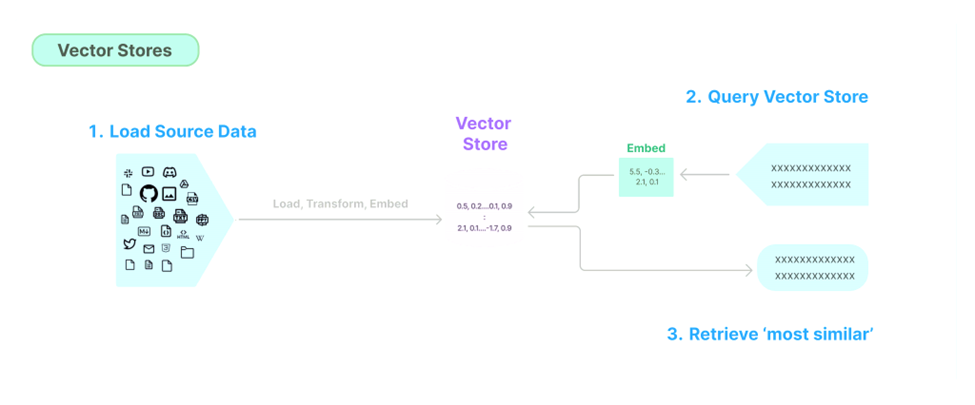

### Chroma Vector DB

#### Similarity Search Using Chroma DB - Example 1

#### Chroma is an AI-native, open-source vector database designed to enhance developer productivity and satisfaction. It is licensed under Apache 2.0.

<font color=Blue><b>Prompt templates can take any number of input variables, and can be formatted to generate a prompt.<br>

<font color=blue>parameters : <br>
examamples: list of examples available to select from,<br>
Embeddings(): Embedding class used to produce embeddings which are used to measure semantic similarity.
vector DB: VectorStore class that is used to store the embeddings and do a similarity search over.

In [139]:
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate

examples = [
  {
    "question": "Who won first Turing award?",
    "answer":
"""
Are follow up questions needed here: No.
So the final answer is: Alan J. Perlis
"""
  },
  { "question": "Who invented radio?",
    "answer": """
Are follow up questions needed here: Yes.
Follow up: in which year was Radio was invented?
Intermediate answer: 1920.
Follow up: In which place?
Intermediate answer: Italy.
So the final answer is: Guglielmo Marconi
"""
  },
  {
    "question": "Where is Taj mahal Located?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: In which country Taj Mahal located?
Intermediate answer: Taj Mahal is located in India.
Follow up: Who built Taj Mahal?
Intermediate answer: Shah Jahan.
So the final answer is: Agra
"""
  },
]

In [140]:
example_prompt = PromptTemplate(input_variables=["question", "answer"], template="Question: {question}\n{answer}")

print(example_prompt.format(**examples[0]))

Question: Who won first Turing award?

Are follow up questions needed here: No.
So the final answer is: Alan J. Perlis



In [142]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.embeddings import HuggingFaceHubEmbeddings

example_selector = SemanticSimilarityExampleSelector.from_examples(examples,HuggingFaceEmbeddings(),Chroma,k=1)

# Select the most similar example to the input.
question = "Where is Agra?"
selected_examples = example_selector.select_examples({"question": question})
print(f"Examples most similar to the input: {question}")
for example in selected_examples:
    print("\n")
    for k, v in example.items():
        print(f"{k}: {v}")

Examples most similar to the input: Where is Agra?


answer: 
Are follow up questions needed here: Yes.
Follow up: In which country Taj Mahal located?
Intermediate answer: Taj Mahal is located in India.
Follow up: Who built Taj Mahal?
Intermediate answer: Shah Jahan.
So the final answer is: Agra

question: Where is Taj mahal Located?


#### Chroma Vector DB Indexing - Example 2

In [1]:
# import
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter

# load the document and split it into chunks
loader = TextLoader("state_of_the_union.txt")
documents = loader.load()

# split it into chunks
text_splitter = CharacterTextSplitter(chunk_size=1200, chunk_overlap=100)
docs = text_splitter.split_documents(documents)

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n","\n", " "],
    chunk_size = 1000,
    chunk_overlap = 10,
    is_separator_regex=False
)

chunk_list = text_splitter.create_documents(texts=[docs[0].page_content])

In [3]:
# create the open-source embedding function
#embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
embedding_function = HuggingFaceEmbeddings()

# load it into Chroma
db = Chroma.from_documents(chunk_list, embedding_function)

### Similarity Search Retriever

In [4]:
# query it
query = "What amount of funds in Putin's war chest could be rendered worthless by preventing Russia's central bank from defending the Russian Ruble?"
docs = db.similarity_search(query,k=4)

# print results
print(docs[0].page_content)

Zealand, and many others, even Switzerland. ","","We are inflicting pain on Russia and supporting the people of Ukraine. Putin is now isolated from the world more than ever. ","","Together with our allies  we are right now enforcing powerful economic sanctions. ","","We are cutting off Russia s largest banks from the international financial system.  ","","Preventing Russia s central bank from defending the Russian Ruble making Putin s $630 Billion  war fund  worthless.   ","","We are choking off Russia s access to technology that will sap its economic strength and weaken its military for years to come.  ","","Tonight I say to the Russian oligarchs and corrupt leaders who have bilked billions of dollars off this violent regime no more. ","","The U.S. Department of Justice is assembling a dedicated task force to go after the crimes of Russian oligarchs.  ","","We are joining with our European allies to find and seize your yachts your luxury apartments your private jets. We are coming


In [5]:
query = "What it means when president said - America will lead that effort, releasing 30 Million barrels from our own Strategic \
Petroleum Reserve.??"
docs = db.similarity_search(query,k=2)

# print results
print(docs[0].page_content)

a foreign country, has costs around the world. ","","And I m taking robust action to make sure the pain of our sanctions  is targeted at Russia s economy. And I will use every tool at our disposal to protect American businesses and consumers. ","","Tonight, I can announce that the United States has worked with 30 other countries to release 60 Million barrels of oil from reserves around the world.  ","","America will lead that effort, releasing 30 Million barrels from our own Strategic Petroleum Reserve. And we stand ready to do more if necessary, unified with our allies.  ","","These steps will help blunt gas prices here at home. And I know the news about what s happening can seem alarming. ","","But I want you to know that we are going to be okay. ","","When the history of this era is written Putin s war on Ukraine will have left Russia weaker and the rest of the world stronger. ","","While it shouldn t have taken something so terrible for people around the world to see what s at


## FAISS Vector DB

Facebook AI Similarity Search (Faiss) is a library designed for efficient similarity search and clustering of dense vectors. It includes algorithms capable of searching within vector sets of any size, even those too large to fit in RAM. Additionally, it offers supporting code for evaluation and parameter tuning.

In [1]:
# Uncomment the following line if you need to initialize FAISS with no AVX2 optimization
# os.environ['FAISS_NO_AVX2'] = '1'

from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

from langchain_text_splitters import CharacterTextSplitter

loader = TextLoader("state_of_the_union.txt")
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n","\n", " "],
    chunk_size = 1000,
    chunk_overlap = 10,
    is_separator_regex=False
)

chunk_list = text_splitter.create_documents(texts=[docs[0].page_content])

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings =  HuggingFaceEmbeddings()
db = FAISS.from_documents(chunk_list, embeddings)
print(db.index.ntotal)

45


In [4]:
db

### Similarity Search Retriever

In [82]:
query ="Who is one of the nation's brightest legal minds ?"
docs = db.similarity_search(query)

In [83]:
print(docs)

[Document(page_content='top legal minds, who will continue Justice Breyer s legacy of excellence. ","","A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she s been nominated, she s received a broad range of support from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. ","","And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. ","","We can do both. At our border, we ve installed new technology like cutting-edge scanners to better detect drug smuggling.  ","","We ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  ","","We re putting in place dedicated immigration judges so families fleeing persecution and violence can have their cases heard faster. ","","We re securing commitments and supporting partners in South and Central America to host more

### Note: The following section is continued from previous section of indexing with FAISS

#### Vector Store-Backed Retriever

A vector store-backed retriever is a retriever that leverages a vector store to fetch documents. It serves as a lightweight wrapper around the vector store class, ensuring it adheres to the retriever interface. By utilizing the search methods implemented by the vector store, such as similarity search and MMR, it can query texts stored within the vector store.

In [86]:
retriever = db.as_retriever()
docs = retriever.invoke("Who is one of the nation's brightest legal minds ?")
docs

[Document(page_content='top legal minds, who will continue Justice Breyer s legacy of excellence. ","","A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she s been nominated, she s received a broad range of support from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. ","","And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. ","","We can do both. At our border, we ve installed new technology like cutting-edge scanners to better detect drug smuggling.  ","","We ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  ","","We re putting in place dedicated immigration judges so families fleeing persecution and violence can have their cases heard faster. ","","We re securing commitments and supporting partners in South and Central America to host more

##### Maximum Marginal Relevance Retrieval

Similarity search and MMR are two techniques used to retrieve relevant information from a dataset. Similarity search focuses on finding items that are most alike to a given query, prioritizing closeness in content or features. On the other hand, MMR aims to balance relevance with diversity, ensuring retrieved items are not only related to the query but also distinct from each other. This makes similarity search ideal for tasks like product recommendations, while MMR excels in generating summaries or creating diverse result sets.

By default, the vector store-backed retriever uses similarity search. However, if the underlying vector store supports maximum marginal relevance (MMR) search, you can specify this as the search type.

In [89]:
retriever = db.as_retriever(search_type="mmr")
docs = retriever.invoke("Who is one of the nation's brightest legal minds ?")
docs 

[Document(page_content='top legal minds, who will continue Justice Breyer s legacy of excellence. ","","A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she s been nominated, she s received a broad range of support from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. ","","And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. ","","We can do both. At our border, we ve installed new technology like cutting-edge scanners to better detect drug smuggling.  ","","We ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  ","","We re putting in place dedicated immigration judges so families fleeing persecution and violence can have their cases heard faster. ","","We re securing commitments and supporting partners in South and Central America to host more

##### Similarity score threshold retrieval

In [90]:
retriever = db.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)

In [91]:
docs = retriever.invoke("Who is one of the nation's brightest legal minds ?")

C:\Users\siddhanna.janai\AppData\Roaming\Python\Python311\site-packages\langchain_core\vectorstores\base.py:733: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='top legal minds, who will continue Justice Breyer s legacy of excellence. ","","A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she s been nominated, she s received a broad range of support from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. ","","And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. ","","We can do both. At our border, we ve installed new technology like cutting-edge scanners to better detect drug smuggling.  ","","We ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  ","","We re putting in place dedicated immigration judges so fa

In [50]:
docs

[]

#### Specifying top k

In [93]:
retriever = db.as_retriever(search_kwargs={"k": 2})
docs = retriever.invoke("Who is one of the nation's brightest legal minds ?")
len(docs)

2

In [94]:
docs

[Document(page_content='top legal minds, who will continue Justice Breyer s legacy of excellence. ","","A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she s been nominated, she s received a broad range of support from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. ","","And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. ","","We can do both. At our border, we ve installed new technology like cutting-edge scanners to better detect drug smuggling.  ","","We ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  ","","We re putting in place dedicated immigration judges so families fleeing persecution and violence can have their cases heard faster. ","","We re securing commitments and supporting partners in South and Central America to host more

## MultiQueryRetrieve

The MultiQueryRetriever enhances distance-based vector database retrieval by automating prompt tuning. 

>It uses a language model to generate multiple queries from different perspectives for a given input query. Each query retrieves relevant documents, and the unique union of these results forms a larger set of potentially relevant documents. This approach helps overcome limitations of distance-based retrieval and produces a richer set of results.

In [5]:
from getpass import getpass
#from langchain import HuggingFaceHub
from langchain_community.llms import HuggingFaceHub
import os

HUGGINGFACEHUB_API_TOKEN = getpass()
#place your huggingface API key after running this cell
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

 ········


In [6]:
from langchain_huggingface import HuggingFaceEndpoint
llm = HuggingFaceEndpoint(
    repo_id="HuggingFaceH4/zephyr-7b-beta", #meta-llama/Meta-Llama-3-8B-Instruct", HuggingFaceH4/zephyr-7b-beta
    task="text-generation",
        max_new_tokens= 256,
        top_k= 30,
        temperature= 0.1,
        repetition_penalty= 1.03,
)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\siddhanna.janai\.cache\huggingface\token
Login successful


In [11]:
from langchain.retrievers.multi_query import MultiQueryRetriever
question ="Who is one of the nation's brightest legal minds ?"

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=db.as_retriever(), llm=llm
)

In [12]:
retriever_from_llm

MultiQueryRetriever(retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000016CE0636F50>), llm_chain=PromptTemplate(input_variables=['question'], template='You are an AI language model assistant. Your task is \n    to generate 3 different versions of the given user \n    question to retrieve relevant documents from a vector  database. \n    By generating multiple perspectives on the user question, \n    your goal is to help the user overcome some of the limitations \n    of distance-based similarity search. Provide these alternative \n    questions separated by newlines. Original question: {question}')
| HuggingFaceEndpoint(repo_id='HuggingFaceH4/zephyr-7b-beta', max_new_tokens=256, top_k=30, temperature=0.1, repetition_penalty=1.03, model='HuggingFaceH4/zephyr-7b-beta', client=<InferenceClient(model='HuggingFaceH4/zephyr-7b-beta', timeout=120)>, async_client=<InferenceClient(model='HuggingFaceH4

In [13]:
unique_docs = retriever_from_llm.invoke(question,verbose=True)

len(unique_docs)

7

In [14]:
print(unique_docs)

[Document(page_content='top legal minds, who will continue Justice Breyer s legacy of excellence. ","","A former top litigator in private practice. A former federal public defender. And from a family of public school educators and police officers. A consensus builder. Since she s been nominated, she s received a broad range of support from the Fraternal Order of Police to former judges appointed by Democrats and Republicans. ","","And if we are to advance liberty and justice, we need to secure the Border and fix the immigration system. ","","We can do both. At our border, we ve installed new technology like cutting-edge scanners to better detect drug smuggling.  ","","We ve set up joint patrols with Mexico and Guatemala to catch more human traffickers.  ","","We re putting in place dedicated immigration judges so families fleeing persecution and violence can have their cases heard faster. ","","We re securing commitments and supporting partners in South and Central America to host more

## Generation

##### Create a question-answering instance (qa) using the RetrievalQA class. This instance is configured with a language model (llm), the "refine" chain type, the previously created retriever, and an option to exclude returning source documents.

###### Retriever is from previous section

In [16]:
from langchain.chains import RetrievalQA
retriever = db.as_retriever(search_kwargs={"k": 2})
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="refine", retriever=retriever, return_source_documents=False)

Now, we call this QA chain with the question we want to ask.

In [18]:
question = "Who is one of the nation's brightest legal minds ?"
completion = qa.run({"query": question})
print(completion)



Based on the new context provided, it can be inferred that Ketanji Brown Jackson, who was recently nominated by President Biden to serve on the United States Supreme Court, is one of the nation's brightest legal minds. This inference can be drawn from the fact that President Biden referred to her as "one of our nation's top legal minds" in his speech, highlighting her exceptional legal acumen and expertise. Additionally, her impressive background and credentials, including her service as a federal judge and a clerk for Justice Stephen Breyer, further support this conclusion.
